#### Auteur: Irina Maslowski

### Projet N°2: Conception d'une application au service de la santé publique

#### Données: Open Food Facts (1,562,081 products) <https://world.openfoodfacts.org/>

##### Variables: voir <https://world.openfoodfacts.org/data/data-fields.txt>

In [1]:
import pandas as pd

importation des librairies permettant d'afficher des graphiques

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import missingno as msno

In [5]:
import numpy as np

ouverture du fichier contenant les données en mode lecture

In [19]:
#df=pd.read_csv(r'D:\OpenClassroomsProjectData\en.openfoodfacts.org.products.csv')
#df.head()

ParserError: Error tokenizing data. C error: Expected 37 fields in line 15, saw 46


test ouverture fichier par défaut -> mauvais séparateur

on indique explicitement le type de séparateur et l'encodage

In [6]:
df=pd.read_csv('D:/OpenClassroomsProjectData/en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8', low_memory=False)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# nombre de ligne dans la data frame
len(df)

1555491

In [8]:
# nombre de colonnes dans la data frame
columns_numb = len(df.columns)
print (columns_numb)

183


**Noms des colonnes**

In [9]:
# noms des colonnes
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'packaging_text', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'origins', 'origins_tags',
       'origins_en', 'manufacturing_places', 'manufacturing_places_tags',
       'labels', 'labels_tags', 'labels_en', 'emb_codes',
       'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_fro

__Principales caractéristiques statistiques des données__

In [10]:
df.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.555491e+06,1.555491e+06,0.0,0.0,4.489840e+05,0.0,660776.000000,0.0,660776.000000,0.0,...,11125.000000,617047.000000,25.000000,3.000000,0.0,39.000000,1713.000000,26.000000,45.000000,20.000000
mean,1.543040e+09,1.577832e+09,NaN,NaN,2.474723e+16,NaN,2.049876,NaN,0.020847,NaN,...,628.233129,9.149256,8.160000,29.333333,NaN,0.066459,0.068880,3.606538,0.025522,0.038885
std,4.736189e+07,2.705243e+07,NaN,NaN,1.658220e+19,NaN,2.924339,NaN,0.144671,NaN,...,6279.613093,8.901728,9.463438,15.011107,NaN,0.037367,1.826243,1.599497,0.026682,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,...,0.049000,-15.000000,-6.000000,14.000000,NaN,0.000000,0.000000,0.400000,0.001350,0.004000
25%,1.514157e+09,1.568049e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,0.000000,NaN,...,111.000000,1.000000,0.000000,22.000000,NaN,0.047500,0.000008,2.975000,0.009400,0.007000
50%,1.552734e+09,1.587576e+09,NaN,NaN,5.000000e+01,NaN,1.000000,NaN,0.000000,NaN,...,331.500000,10.000000,5.000000,30.000000,NaN,0.069000,0.000023,3.950000,0.020000,0.008500
75%,1.583079e+09,1.594121e+09,NaN,NaN,1.130000e+02,NaN,3.000000,NaN,0.000000,NaN,...,614.200000,16.000000,17.000000,37.000000,NaN,0.089000,0.000096,4.300000,0.027600,0.011250
max,1.608122e+09,1.608122e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,3.000000,NaN,...,656298.600000,40.000000,25.000000,44.000000,NaN,0.150000,54.000000,7.300000,0.150000,0.572000


_contenu de la variable `cities`_

In [11]:
df.cities

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1555486   NaN
1555487   NaN
1555488   NaN
1555489   NaN
1555490   NaN
Name: cities, Length: 1555491, dtype: float64

_number_of_lines_ contient le nombre de lignes dans le tableau

In [9]:
number_of_lines = len(df)
print(number_of_lines)

1555491


création d'un fichier contenant un échantillon de données

In [1]:
import csv

In [2]:
with open('D:/OpenClassroomsProjectData/en.openfoodfacts.org.products.csv', newline='', encoding='utf-8') as csvfile:
    openf = csv.reader(csvfile, delimiter='\t')
    with open('10lines.csv', 'w', newline='', encoding='utf-8') as out_f:
        writer = csv.writer(out_f)
        r=0
        for row in openf: 
            #print(row)
            writer.writerow(row)
            r+=1
            if r>=10:
                break

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrisco

In [30]:
    with open('100lines.csv', 'w', newline='') as f:
        writer = csv.writer(f)

        for row in openf:
            r=0
            while r<=100:
            #line=openf.readline()
                writer.writerow(row)
                r+=1
    

ValueError: I/O operation on closed file.

### Pourcentage de valeurs manquantes par ligne

In [10]:
table_lignes = df.isnull().sum(axis=1).div(columns_numb)*100
print (table_lignes)

0          84.153005
1          89.617486
2          89.071038
3          73.770492
4          86.885246
             ...    
1555486    84.153005
1555487    90.163934
1555488    90.163934
1555489    83.606557
1555490    87.431694
Length: 1555491, dtype: float64


In [62]:
type(table_lignes)

pandas.core.series.Series

### Pourcentage de valeurs manquantes par colonne

In [11]:
table_columns = df.isnull().sum(axis=0).div(number_of_lines)*100
print(table_columns)

code                   0.000000
url                    0.000000
creator                0.000257
created_t              0.000000
created_datetime       0.000000
                        ...    
choline_100g          99.997493
phylloquinone_100g    99.889874
beta-glucan_100g      99.998329
inositol_100g         99.997107
carnitine_100g        99.998714
Length: 183, dtype: float64


##### affichage avec 2 chiffres après la virgule

In [31]:
# pd.options.display.float_format = '{:,.2f} %'.format
# ne pas utiliser cette ligne car transforme toutes les valeur de df en %

In [26]:
print (table_lignes)

0         84.15 %
1         89.62 %
2         89.07 %
3         73.77 %
4         86.89 %
            ...  
1555486   84.15 %
1555487   90.16 %
1555488   90.16 %
1555489   83.61 %
1555490   87.43 %
Length: 1555491, dtype: float64


In [27]:
print(table_columns)

code                   0.00 %
url                    0.00 %
creator                0.00 %
created_t              0.00 %
created_datetime       0.00 %
                       ...   
choline_100g         100.00 %
phylloquinone_100g    99.89 %
beta-glucan_100g     100.00 %
inositol_100g        100.00 %
carnitine_100g       100.00 %
Length: 183, dtype: float64


In [16]:
# TODO : diagramme en barres, trié par ordre croissant/desc

In [7]:
with pd.option_context('display.float_format', '{:,.2f} %'.format):
    print (table_lignes, '\n')
    print(table_columns)

0         84.15 %
1         89.62 %
2         89.07 %
3         73.77 %
4         86.89 %
            ...  
1555486   84.15 %
1555487   90.16 %
1555488   90.16 %
1555489   83.61 %
1555490   87.43 %
Length: 1555491, dtype: float64 

code                   0.00 %
url                    0.00 %
creator                0.00 %
created_t              0.00 %
created_datetime       0.00 %
                       ...   
choline_100g         100.00 %
phylloquinone_100g    99.89 %
beta-glucan_100g     100.00 %
inositol_100g        100.00 %
carnitine_100g       100.00 %
Length: 183, dtype: float64


In [12]:
df_stats = df.describe()

In [13]:
df_stats

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.555491e+06,1.555491e+06,0.0,0.0,4.489840e+05,0.0,660776.000000,0.0,660776.000000,0.0,...,11125.000000,617047.000000,25.000000,3.000000,0.0,39.000000,1713.000000,26.000000,45.000000,20.000000
mean,1.543040e+09,1.577832e+09,NaN,NaN,2.474723e+16,NaN,2.049876,NaN,0.020847,NaN,...,628.233129,9.149256,8.160000,29.333333,NaN,0.066459,0.068880,3.606538,0.025522,0.038885
std,4.736189e+07,2.705243e+07,NaN,NaN,1.658220e+19,NaN,2.924339,NaN,0.144671,NaN,...,6279.613093,8.901728,9.463438,15.011107,NaN,0.037367,1.826243,1.599497,0.026682,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,...,0.049000,-15.000000,-6.000000,14.000000,NaN,0.000000,0.000000,0.400000,0.001350,0.004000
25%,1.514157e+09,1.568049e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,0.000000,NaN,...,111.000000,1.000000,0.000000,22.000000,NaN,0.047500,0.000008,2.975000,0.009400,0.007000
50%,1.552734e+09,1.587576e+09,NaN,NaN,5.000000e+01,NaN,1.000000,NaN,0.000000,NaN,...,331.500000,10.000000,5.000000,30.000000,NaN,0.069000,0.000023,3.950000,0.020000,0.008500
75%,1.583079e+09,1.594121e+09,NaN,NaN,1.130000e+02,NaN,3.000000,NaN,0.000000,NaN,...,614.200000,16.000000,17.000000,37.000000,NaN,0.089000,0.000096,4.300000,0.027600,0.011250
max,1.608122e+09,1.608122e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,3.000000,NaN,...,656298.600000,40.000000,25.000000,44.000000,NaN,0.150000,54.000000,7.300000,0.150000,0.572000


sauvegarder le résultat dans dataframe

In [ ]:
#DataFrame.insert(loc, column, value, allow_duplicates=False)

insertion d'une colonne contenant l'information sur les valeurs manquantes par ligne

In [15]:
#df.insert(columns_numb, 'missing_value_percentage', table_lignes)

vérification de l'existance de la colonne `missing_value_percentage` dans la data frame

In [17]:
#df['missing_value_percentage']

0          84.153005
1          89.617486
2          89.071038
3          73.770492
4          86.885246
             ...    
1555486    84.153005
1555487    90.163934
1555488    90.163934
1555489    83.606557
1555490    87.431694
Name: missing_value_percentage, Length: 1555491, dtype: float64

In [ ]:
# idée
#si la ligne contient moins de 50% de valeurs manquantes, alors extraire ces lignes et mettre dans un csv?

In [19]:
table_lignes>0.5

0          True
1          True
2          True
3          True
4          True
           ... 
1555486    True
1555487    True
1555488    True
1555489    True
1555490    True
Length: 1555491, dtype: bool

In [20]:
df[table_lignes>90]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
10,000000000054,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1582569032,2020-02-24T18:30:32Z,Limonade artisanale a la rose,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0000000001001,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537766416,2018-09-24T05:20:16Z,1537766416,2018-09-24T05:20:16Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,000000000436,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572776836,2019-11-03T10:27:16Z,1572776837,2019-11-03T10:27:17Z,Caramel vanille,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,0000000009317,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1509378135,2017-10-30T15:42:15Z,1509378135,2017-10-30T15:42:15Z,Mediterranean Pasta Salad,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,0000000010313,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1547292725,2019-01-12T11:32:05Z,1547292728,2019-01-12T11:32:08Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555467,9999990060518,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1563975409,2019-07-24T13:36:49Z,1563975410,2019-07-24T13:36:50Z,Cailloux aromes fruits,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555470,9999990060563,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1566038644,2019-08-17T10:44:04Z,1566038645,2019-08-17T10:44:05Z,Cailloux Coeur Chocolat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555471,9999990060600,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1599228124,2020-09-04T14:02:04Z,1599228125,2020-09-04T14:02:05Z,Pastilles Menthe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555487,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
table_lignes.describe()

count    1.555491e+06
mean     7.911027e+01
std      7.169198e+00
min      4.644809e+01
25%      7.267760e+01
50%      7.978142e+01
75%      8.415301e+01
max      9.453552e+01
dtype: float64

In [22]:
table_columns.describe()

count    183.000000
mean      79.110271
std       32.510849
min        0.000000
25%       66.819352
50%       99.125357
75%       99.993828
max      100.000000
dtype: float64

#### TODO

1. voir soit sur le graphique, soit sur ___describe___ quel colonnes, lignes à supprimer

2. cohérence de données: valeurs aberrantes (outliers: la règle >3 équartypes de moyenne ne pas utiliser)
3. mauvais contributeur?

4. finir nettoyage de lignes et de colonnes, choisir les variables (voir si on peut regroupper les varibles)
5. pour les varibles non-pertinantes non-rempli ?
6. utiliser des formules de calcules pour certaines données manquantes ==> l'imputation des valeurs manquantes
7. les bobliothèques à utiliser: ___matplotlib___, ___seaborn___, ___pandas___

In [ ]:
# à ne pas faire sur tous les données !!! car l'affichage n'est pas possible
#table_lignes.plot(kind='bar')

# Affichage d'un histogramme de valeurs manquantes par ligne

Text(-0.04, 0.5, 'nombre de lignes')

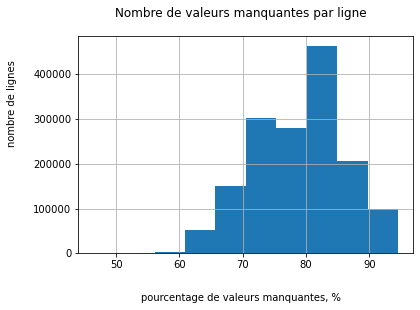

In [14]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_lignes.hist()
# set title and axis labels
plt.suptitle('Nombre de valeurs manquantes par ligne')
fig.text(0.5, -0.04, 'pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'nombre de lignes', rotation='vertical')

pour pouvoir mieux visualiser la répartition de nombre de lignes en fonction de quantité de valeurs manquantes, on augemente le nombre de classes affichés à 20

Text(-0.04, 0.5, 'nombre de lignes')

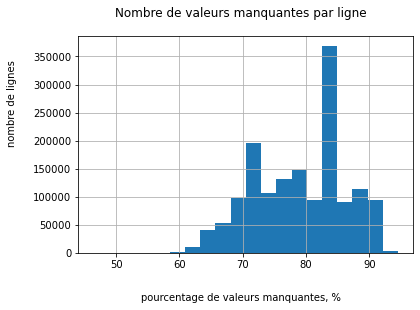

In [15]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_lignes.hist(bins=20)
# set title and axis labels
plt.suptitle('Nombre de valeurs manquantes par ligne')
fig.text(0.5, -0.04, 'pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'nombre de lignes', rotation='vertical')

Ensuite on affiche la même information mais en calculant le nombre de lignes en pourcentage de dataset total, en mettant _density=True_. Cela permet de mieux comprendre quel part de dataset contient des lignes avec des valeurs manquantes

Text(-0.04, 0.5, 'nombre de lignes')

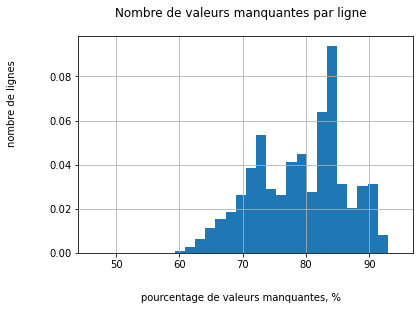

In [16]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_lignes.hist(bins=30, density=True)
# set title and axis labels
plt.suptitle('Nombre de valeurs manquantes par ligne')
fig.text(0.5, -0.04, 'pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'nombre de lignes', rotation='vertical')

**Fonction de répartition empirique**

chaque marche de l'escalier représente le cumul des valeurs des marches précédentes avec les valeurs un peu plus élevées

Text(-0.04, 0.5, 'nombre de lignes')

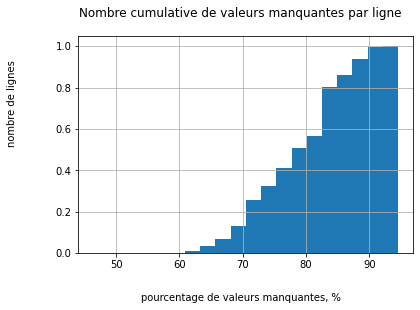

In [17]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_lignes.hist(bins=20, density=True, cumulative=True)
# set title and axis labels
plt.suptitle('Nombre cumulative de valeurs manquantes par ligne')
fig.text(0.5, -0.04, 'pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'nombre de lignes', rotation='vertical')

Cette histogramme permet de voir que __si on supprime les lignes avec 90% de valeurs manquantes__, on gardera pratiquement tout le dataset.

Les histogrammes permettent de voir aussi que les données ne sont pas homogènes: il y a des piques entre 71% et 74% des valeurs manquantes, et entre 82% et 85%. Cela peut-être lié aux types de produits. Nous allons extraire donc des échantillons de dataset pour les produits se trouvant avant ses piques de valeurs, à l'intèrieur et après.

In [49]:
# mask = df[(df.col > 5) & (df.col < 10)]  -> Masque : 1 série True/False
# df[mask] -> Filtre sur mask == True
# df[mask].sample(100) -> 100 éléments au hasard 

##### Echantillon N°1 avant le pique de 71%

In [44]:
df[(table_lignes > 65) & (table_lignes < 70)].sample(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
984832,4013200862169,http://world-en.openfoodfacts.org/product/4013...,date-limite-app,1552676229,2019-03-15T18:57:09Z,1588415515,2020-05-02T10:31:55Z,Curry-Paste scharf,NaN,125 g,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998354,4044889000054,http://world-en.openfoodfacts.org/product/4044...,vincentrou,1382478121,2013-10-22T21:42:01Z,1592577297,2020-06-19T14:34:57Z,Feine Bitter 85% Cacao Santo Domingo,NaN,100 g,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1490430,8710400325239,http://world-en.openfoodfacts.org/product/8710...,aleene,1478337301,2016-11-05T09:15:01Z,1605810060,2020-11-19T18:21:00Z,Crème fraîche,NaN,200 g,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428896,8435434307289,http://world-en.openfoodfacts.org/product/8435...,antmarfil,1495745991,2017-05-25T20:59:51Z,1580141951,2020-01-27T16:19:11Z,Alcachofa troceada,Alcachofa troceada,450 g,...,NaN,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856181,3608580010944,http://world-en.openfoodfacts.org/product/3608...,moon-rabbit,1572108342,2019-10-26T16:45:42Z,1574546496,2019-11-23T22:01:36Z,Yaourt sur lit ananas et passion,NaN,500 g (4x125g),...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328892,8059070741018,http://world-en.openfoodfacts.org/product/8059...,kiliweb,1499620732,2017-07-09T17:18:52Z,1594554033,2020-07-12T11:40:33Z,Gressins au romarin,NaN,300g,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685762,3263859347512,http://world-en.openfoodfacts.org/product/3263...,sebleouf,1464523541,2016-05-29T12:05:41Z,1587844174,2020-04-25T19:49:34Z,Vigny,NaN,220 g,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797030,3487400001597,http://world-en.openfoodfacts.org/product/3487...,tacite,1429210859,2015-04-16T19:00:59Z,1442857378,2015-09-21T17:42:58Z,Fibres,Blé dur précuit,500 g,...,NaN,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587734,3029330063193,http://world-en.openfoodfacts.org/product/3029...,jacob80,1408781430,2014-08-23T08:10:30Z,1577359380,2019-12-26T11:23:00Z,Brasserie Burger Nature (x 4),Pain spécial au froment tranché et préemballé,330 g,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193099,0073402108100,http://world-en.openfoodfacts.org/product/0073...,usda-ndb-import,1489138086,2017-03-10T09:28:06Z,1587630473,2020-04-23T08:27:53Z,Swirl Cinnamon Bread,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Echantillon N°2 du pique de 71%

In [51]:
df[(table_lignes > 71) & (table_lignes < 74)].sample(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
261134,0201417005903,http://world-en.openfoodfacts.org/product/0201...,openfoodfacts-contributors,1537509385,2018-09-21T05:56:25Z,1599914458,2020-09-12T12:40:58Z,Boule de froment,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674760,3258561300542,http://world-en.openfoodfacts.org/product/3258...,openfoodfacts-contributors,1502262075,2017-08-09T07:01:15Z,1590869574,2020-05-30T20:12:54Z,Sirop de Cassis,NaN,75 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375726,0790555061525,http://world-en.openfoodfacts.org/product/0790...,usda-ndb-import,1489062832,2017-03-09T12:33:52Z,1587578283,2020-04-22T17:58:03Z,Baked Beans,NaN,NaN,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127759,0048500202319,http://world-en.openfoodfacts.org/product/0048...,org-database-usda,1587654744,2020-04-23T15:12:24Z,1587654745,2020-04-23T15:12:25Z,"100% juice, orange pineapple",NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880922,3700650900947,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1508067760,2017-10-15T11:42:40Z,1552298707,2019-03-11T10:05:07Z,Abricots moelleux,NaN,200 g,...,NaN,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921895,3760159101429,http://world-en.openfoodfacts.org/product/3760...,kiliweb,1505844907,2017-09-19T18:15:07Z,1525373922,2018-05-03T18:58:42Z,Chocolat noir eclats caramel,NaN,100 g,...,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315778,0631656703313,http://world-en.openfoodfacts.org/product/0631...,kiliweb,1517704469,2018-02-04T00:34:29Z,1591684981,2020-06-09T06:43:01Z,Muscletech Nitro Tech Performance (1.800G),NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39397,0021130627790,http://world-en.openfoodfacts.org/product/0021...,usda-ndb-import,1489078200,2017-03-09T16:50:00Z,1587589626,2020-04-22T21:07:06Z,"Signature kitchens, dessert shells",NaN,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85326,0041130289712,http://world-en.openfoodfacts.org/product/0041...,org-database-usda,1587670483,2020-04-23T19:34:43Z,1587670483,2020-04-23T19:34:43Z,"French vanilla non-dairy coffee creamer, frenc...",NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768800,3413160001812,http://world-en.openfoodfacts.org/product/3413...,kiliweb,1504080572,2017-08-30T08:09:32Z,1591343506,2020-06-05T07:51:46Z,"Yaourt brasse sucre, saveur Barbe a Papa, les ...",NaN,300 g (2x150g),...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


à première vu, le deuxième échantillon contient essentiellement des produits dont les noms sont rédigés en anglais et la colonne nutri-score est moins bien remplie

##### Echantillon N°3 après le pique de 71%

In [52]:
df[(table_lignes > 75) & (table_lignes < 81)].sample(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
60447,0031200024725,http://world-en.openfoodfacts.org/product/0031...,org-database-usda,1587662671,2020-04-23T17:24:31Z,1587662671,2020-04-23T17:24:31Z,"Cranberry, concord grape, and blueberry juice ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360551,8411726221044,http://world-en.openfoodfacts.org/product/8411...,kiliweb,1519386181,2018-02-23T11:43:01Z,1539678644,2018-10-16T08:30:44Z,Coeurs d'artichaut,NaN,NaN,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125490,5400141274646,http://world-en.openfoodfacts.org/product/5400...,kiliweb,1559297805,2019-05-31T10:16:45Z,1564739458,2019-08-02T09:50:58Z,Mozzarella râpée,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912466,3760108027206,http://world-en.openfoodfacts.org/product/3760...,kiliweb,1546979682,2019-01-08T20:34:42Z,1554379948,2019-04-04T12:12:28Z,Moutarde aromatisée au jus de truffe,NaN,NaN,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1361001,8411795010501,http://world-en.openfoodfacts.org/product/8411...,kiliweb,1577201594,2019-12-24T15:33:14Z,1581527578,2020-02-12T17:12:58Z,Salmón ahumado,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187372,6091061401701,http://world-en.openfoodfacts.org/product/6091...,openfoodfacts-contributors,1564438247,2019-07-29T22:10:47Z,1564438290,2019-07-29T22:11:30Z,Mellesjokolade,NaN,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916406,3760126978566,http://world-en.openfoodfacts.org/product/3760...,kiliweb,1582197713,2020-02-20T11:21:53Z,1583083910,2020-03-01T17:31:50Z,6 macarons vanille,NaN,NaN,...,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577490,2951806003475,http://world-en.openfoodfacts.org/product/2951...,malikele,1429626406,2015-04-21T14:26:46Z,1606725761,2020-11-30T08:42:41Z,Carrillada de cerdo,Cerdo,"0,475kg",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748386,3358170136256,http://world-en.openfoodfacts.org/product/3358...,kiliweb,1518897955,2018-02-17T20:05:55Z,1601561467,2020-10-01T14:11:07Z,Salade Italienne DR HAMMER,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548261,2600468019811,http://world-en.openfoodfacts.org/product/2600...,kiliweb,1527874405,2018-06-01T17:33:25Z,1582744150,2020-02-26T19:09:10Z,COMTE AOP Bio,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


à première vu, la particularité de cet échantillon est que la colonne quantité est rarement rempli et le nom des produits est rédigé en plusieurs langues différentes

##### Echantillon N°4 du pique de 82%

In [53]:
df[(table_lignes > 82) & (table_lignes < 85)].sample(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
877445,3700428457451,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1549573972,2019-02-07T21:12:52Z,1588002506,2020-04-27T15:48:26Z,Galantine de pintade,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260424,0201042015353,http://world-en.openfoodfacts.org/product/0201...,kiliweb,1525867448,2018-05-09T12:04:08Z,1525867517,2018-05-09T12:05:17Z,Merzer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543304,9300675031226,http://world-en.openfoodfacts.org/product/9300...,openfoodfacts-contributors,1440424505,2015-08-24T13:55:05Z,1574741618,2019-11-26T04:13:38Z,Coca-Cola Zero,NaN,600mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159404,0068100004618,http://world-en.openfoodfacts.org/product/0068...,openfoodfacts-contributors,1572199560,2019-10-27T18:06:00Z,1579030178,2020-01-14T19:29:38Z,Parmesan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884455,3700956429982,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1534432178,2018-08-16T15:09:38Z,1588350532,2020-05-01T16:28:52Z,Les dorées de Pont-Aven,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1160240,5600961119985,http://world-en.openfoodfacts.org/product/5600...,kiliweb,1602517516,2020-10-12T15:45:16Z,1602535420,2020-10-12T20:43:40Z,H2O • Hair Skin & Nails • peach flavor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204338,6930299220107,http://world-en.openfoodfacts.org/product/6930...,kiliweb,1549881639,2019-02-11T10:40:39Z,1590858926,2020-05-30T17:15:26Z,Fresh Shimeji Mushroom-brown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254234,01567878,http://world-en.openfoodfacts.org/product/0156...,kiliweb,1566217442,2019-08-19T12:24:02Z,1566217444,2019-08-19T12:24:04Z,Turrón diverso de cacahuete,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906234,3760078999640,http://world-en.openfoodfacts.org/product/3760...,kiliweb,1553156040,2019-03-21T08:14:00Z,1582301450,2020-02-21T16:10:50Z,Friture de Pâques,NaN,1000 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412859,8428607866027,http://world-en.openfoodfacts.org/product/8428...,kiliweb,1568736930,2019-09-17T16:15:30Z,1605091548,2020-11-11T10:45:48Z,Mejillones fritos escabeche,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dans cet échantillon la majorité des produits sont rentrés par le même utilisateur

##### Echantillon N°5 après le pique de 82%

In [55]:
df[(table_lignes > 86) & (table_lignes < 100)].sample(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
597169,3059946240633,http://world-en.openfoodfacts.org/product/3059...,foodvisor,1561571152,2019-06-26T17:45:52Z,1561571152,2019-06-26T17:45:52Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096504,5060044480638,http://world-en.openfoodfacts.org/product/5060...,openfoodfacts-contributors,1485716331,2017-01-29T18:58:51Z,1485716604,2017-01-29T19:03:24Z,the arran malt single malt scotch whisky,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253202,01222180,http://world-en.openfoodfacts.org/product/0122...,openfoodfacts-contributors,1606443559,2020-11-27T02:19:19Z,1606443569,2020-11-27T02:19:29Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979924,4009301040926,http://world-en.openfoodfacts.org/product/4009...,date-limite-app,1491984283,2017-04-12T08:04:43Z,1535889864,2018-09-02T12:04:24Z,Gouda,NaN,200 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273212,0209299009903,http://world-en.openfoodfacts.org/product/0209...,kiliweb,1583240708,2020-03-03T13:05:08Z,1583241417,2020-03-03T13:16:57Z,Mortadelle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288307,0252805228930,http://world-en.openfoodfacts.org/product/0252...,kiliweb,1582028899,2020-02-18T12:28:19Z,1582028900,2020-02-18T12:28:20Z,Bourgesdis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095929,5060011700707,http://world-en.openfoodfacts.org/product/5060...,openfoodfacts-contributors,1548185850,2019-01-22T19:37:30Z,1548186091,2019-01-22T19:41:31Z,Pickle Power,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264282,7640104435242,http://world-en.openfoodfacts.org/product/7640...,foodrepo,1548772972,2019-01-29T14:42:52Z,1567008501,2019-08-28T16:08:21Z,Sesame snaps,NaN,35 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486943,2122726004501,http://world-en.openfoodfacts.org/product/2122...,foodrepo,1548767151,2019-01-29T13:05:51Z,1567008275,2019-08-28T16:04:35Z,Appenzeller Switzerland Surchoix,NaN,2.51 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300584,034856028932,http://world-en.openfoodfacts.org/product/0348...,foodvisor,1561570910,2019-06-26T17:41:50Z,1561570911,2019-06-26T17:41:51Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dans l'échantillon N°5 les créateur de contenu sont variés, par contre, souvent, même le nom du produit n'est pas renseigné. Une ligne contient le mot "freedom" en tant que nom du produit.

In [174]:
# La ligne 397862 est rempli d'une façon douteuse. On vérifie si d'autres lignes créées par la même personne sont mieux remplies
# halal-app-chakib
df[df['creator'] == "halal-app-chakib"][['product_name','creator','quantity']]

,product_name,creator,quantity
6413,Cultured dairy blend,halal-app-chakib,32 OZ( 2LB) 907g
19437,Annie's Homegrown Organic Cheesy Ravioli,halal-app-chakib,1
20538,Pepperidge farm crackers whole grain,halal-app-chakib,0.75oz
35113,Kraft deli deluxe white American,halal-app-chakib,453g
42308,Wint-o-green sharing size,halal-app-chakib,14.5 Oz
...,...,...,...
1529762,veggiee fingers,halal-app-chakib,175g
1534321,Koffeinhaltiges Tauringetrank mit susungsmittel.,halal-app-chakib,330 ml
1543645,Maja,halal-app-chakib,16 g
1544260,Biscuit,halal-app-chakib,250g


**Conclusion** : il serait intéressant de trier les données par nom du contributeur (utilisateur) et de supprimer les produits ne possedant pas de nom ni dans la colonne _product_name_, ni dans la colonne _generic_name_

### Affichage de données avec la bibliothèque _missingno_

In [57]:
# à ne pas faire sur tous les données car gourmand en mémoire
#msno.matrix(df)

<AxesSubplot:>

MemoryError: Unable to allocate 8.48 GiB for an array with shape (1555491, 183, 4) and data type float64

<Figure size 1800x720 with 2 Axes>

Text(0, 0.5, 'Lignes')

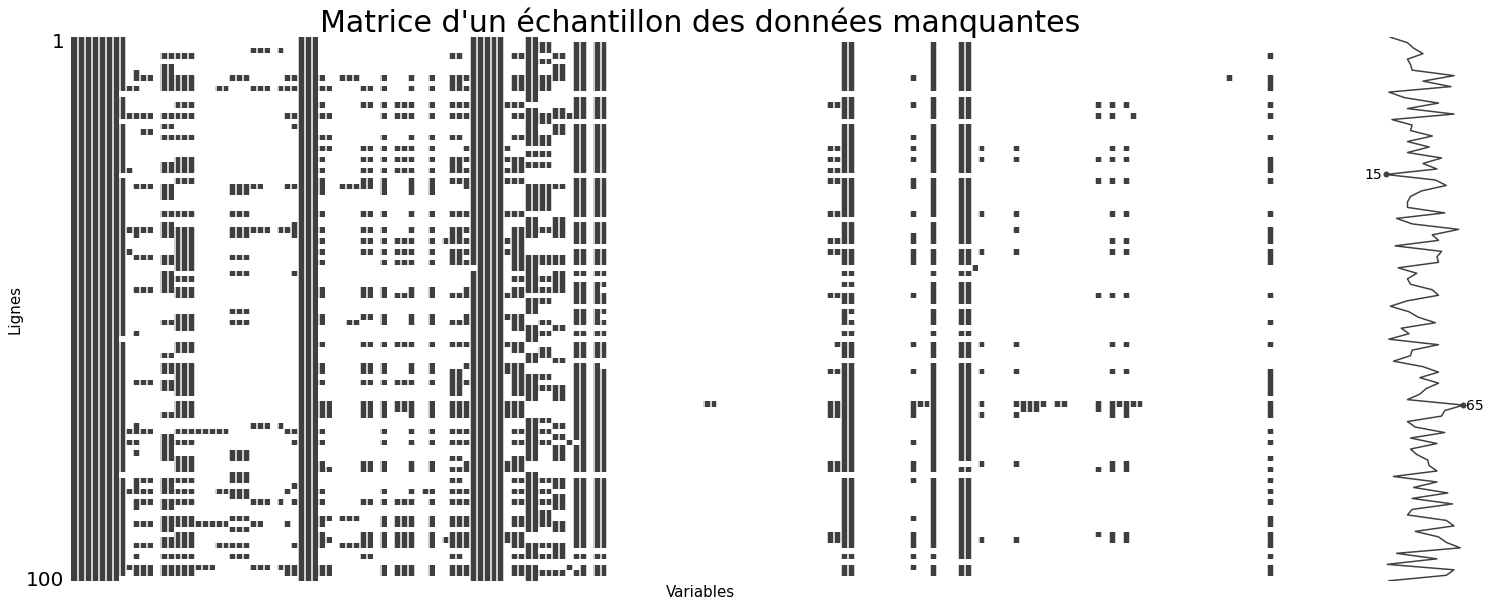

In [30]:
msno.matrix(df.sample(100))
plt.title("Matrice d'un échantillon des données manquantes", fontsize = 30) # title with fontsize 20
plt.xlabel('Variables', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Lignes', fontsize = 15) # y-axis label with fontsize 15

Ce type de graphique n'affiche pas les labels des colonnes si les données contiennent plus de 50 colonnes

<AxesSubplot:>

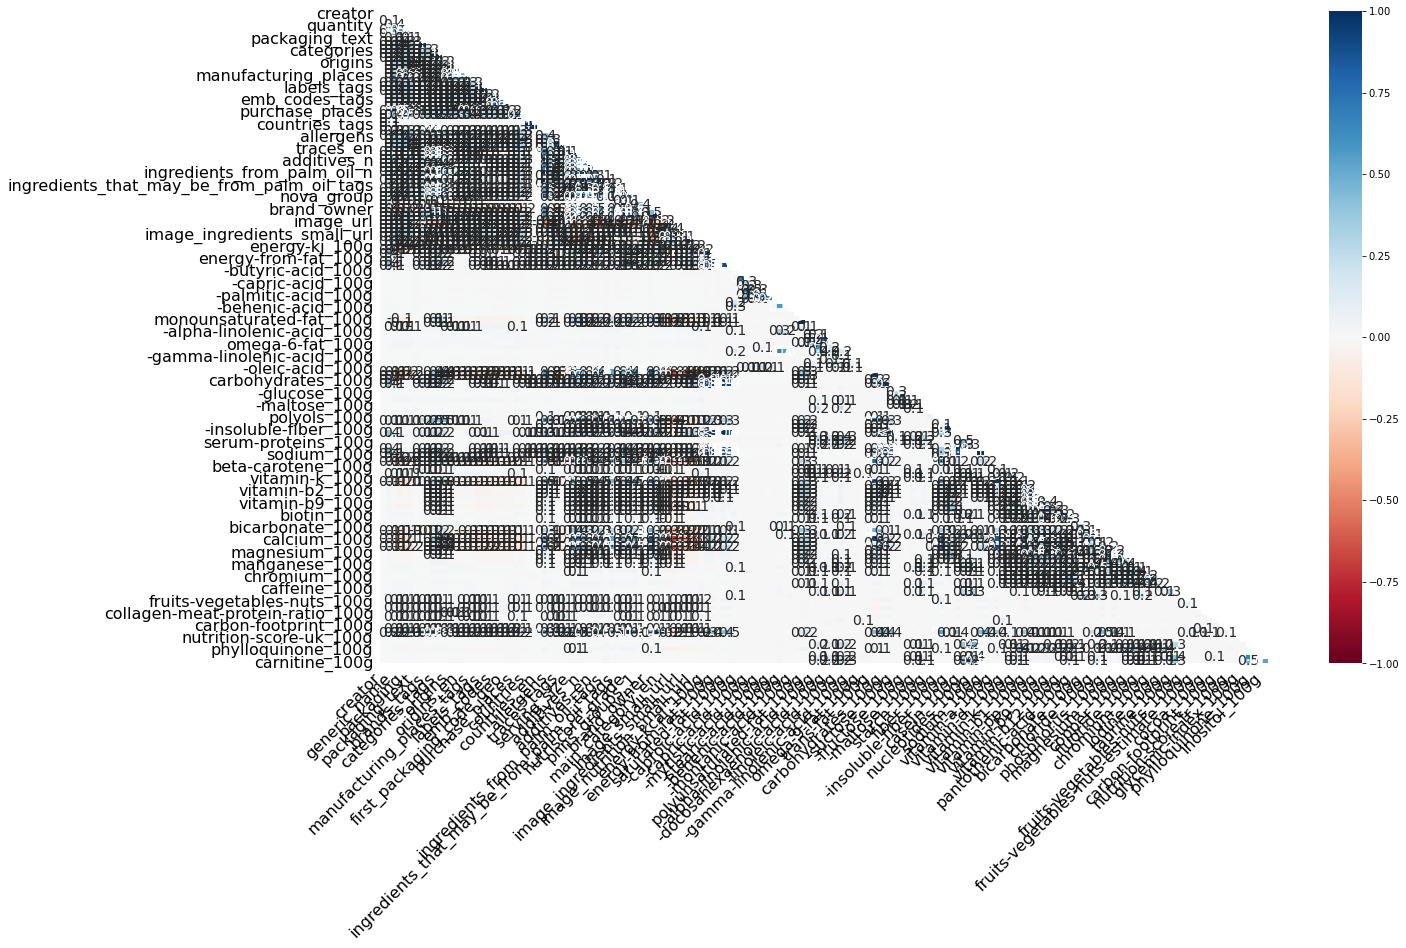

In [59]:
msno.heatmap(df)

In [ ]:
# TODO: à reessayer en enlevant les chiffres en interieur pour voir mieux les couleurs

# Suppression des valeurs manquantes

Je teste deux stratégies de l'ordre de suppression des valeurs manquantes: 
1. Suppression des lignes et ensuite de colonnes;
2. Suppression des colonnes et ensuite de lignes.

## Stratégie 1. Lignes vides et ensuite les colonnes

### suppression de lignes vide à 80 % et plus

In [18]:
# init_size est la taille initiale du jeux de données
init_size = len(df)
print(init_size)

1555491


In [19]:
# le seuil initiallement choisi de 90 % n'est pas suffisement efficace. Le seuil proposé par le mentor: 80 %
df.drop(df[table_lignes > 80].index, inplace=True)

In [20]:
# nombre de lignes après la suppression des lignes non-rempli à 80% et plus
df_lines80 = len(df)
print(df_lines80)

788035


In [21]:
# nombre de lignes supprimées
init_size - df_lines80

767456

In [22]:
# pourcentage de donnée restantes
df_lines80/init_size*100

50.66149530919819

### suppression de colonnes vide à plus de 80 %

Le seuil initillement proposé : 99.99 %

In [23]:
table_columns[table_columns > 80]

generic_name          93.062705
packaging             84.045231
packaging_tags        84.046066
packaging_text        99.930569
origins               95.763846
                        ...    
choline_100g          99.997493
phylloquinone_100g    99.889874
beta-glucan_100g      99.998329
inositol_100g         99.997107
carnitine_100g        99.998714
Length: 128, dtype: float64

In [24]:
df.drop(table_columns[table_columns > 80].index, axis='columns', inplace=True)

In [25]:
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'quantity', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'serving_quantity',
       'additives_n', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url',
       'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       '

In [26]:
# nombre de colonnes restantes
len(df.columns)

55

In [27]:
# nombre de colonnes supprimées
183-55

128

__Note__ : les colonnes qui m'intéresse ___'ingredients_from_palm_oil_n'___, ___'ingredients_that_may_be_from_palm_oil_n'__ sont présentes!

In [ ]:
# product_name & generic_name sont vide
#df.iloc(((table_columns[product_name] == pd.nan) & (table_columns[generic_name] == NAN)).index)

In [42]:
df[df.product_name.isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
872,000036,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537366963,2018-09-19T14:22:43Z,1582275040,2020-02-21T08:50:40Z,NaN,490 g,Bijou,...,1954.0,26.00,17.00,51.00,29.00,1.100,6.70,1.130,0.4520,25.0
2131,00030113,http://world-en.openfoodfacts.org/product/0003...,kiliweb,1517399507,2018-01-31T11:51:47Z,1600837950,2020-09-23T05:12:30Z,NaN,250 ml,Marks & Spencdjdj,...,180.0,0.10,0.10,9.80,9.10,0.500,0.40,0.100,0.0400,3.0
2529,00062855,http://world-en.openfoodfacts.org/product/0006...,waistline-app,1534406584,2018-08-16T08:03:04Z,1550256781,2019-02-15T18:53:01Z,NaN,NaN,M&S,...,472.0,2.10,NaN,17.80,10.90,NaN,4.70,0.103,0.0410,NaN
3098,00087,http://world-en.openfoodfacts.org/product/0008...,openfoodfacts-contributors,1589989006,2020-05-20T15:36:46Z,1589989245,2020-05-20T15:40:45Z,NaN,NaN,Banyan Botanicals,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3158,0008775,http://world-en.openfoodfacts.org/product/0008...,nnamretug,1570216872,2019-10-04T19:21:12Z,1570217628,2019-10-04T19:33:48Z,NaN,NaN,nutri+ Shape & Shake Vegan 3K Protein Vanilla-...,...,1582.0,1.20,0.15,5.30,1.10,2.000,84.60,1.600,0.6400,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553049,9556227821269,http://world-en.openfoodfacts.org/product/9556...,marilyn,1588735576,2020-05-06T03:26:16Z,1588736047,2020-05-06T03:34:07Z,NaN,850 ml,Best choice,...,1381.0,0.00,0.00,81.00,68.00,0.000,1.00,0.125,0.0500,NaN
1553052,9556231110281,http://world-en.openfoodfacts.org/product/9556...,openfoodfacts-contributors,1604455653,2020-11-04T02:07:33Z,1604455847,2020-11-04T02:10:47Z,NaN,NaN,NaN,...,1033.0,2.70,1.20,44.10,NaN,3.000,10.20,0.404,0.1616,NaN
1553691,96130797,http://world-en.openfoodfacts.org/product/9613...,sebleouf,1505915038,2017-09-20T13:43:58Z,1506447358,2017-09-26T17:35:58Z,NaN,25 g,Fisherman's Friend,...,1013.0,1.28,1.28,95.95,0.17,0.002,0.01,0.003,0.0012,NaN
1554867,9851135043117,http://world-en.openfoodfacts.org/product/9851...,openfoodfacts-contributors,1561824691,2019-06-29T16:11:31Z,1561825520,2019-06-29T16:25:20Z,NaN,700ml,Real Thai,...,218.0,0.00,0.00,5.00,5.00,NaN,7.90,27.100,10.8400,11.0


In [102]:
#df[df.product_name.isnull() & df.generic_name.isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,phylloquinone_100g
71,0000000008204,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1538750615,2018-10-05T14:43:35Z,1549964455,2019-02-12T09:40:55Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,0000000234,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574522970,2019-11-23T15:29:30Z,1582240759,2020-02-20T23:19:19Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,0000027533000,http://world-en.openfoodfacts.org/product/0000...,tacinte,1546699324,2019-01-05T14:42:04Z,1546699562,2019-01-05T14:46:02Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,000004595,http://world-en.openfoodfacts.org/product/0000...,elcoco,1573661471,2019-11-13T16:11:11Z,1573661472,2019-11-13T16:11:12Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,00001,http://world-en.openfoodfacts.org/product/00001,elcoco,1572434354,2019-10-30T11:19:14Z,1572434355,2019-10-30T11:19:15Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555323,99558741,http://world-en.openfoodfacts.org/product/9955...,hunsly,1586073335,2020-04-05T07:55:35Z,1586074047,2020-04-05T08:07:27Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555349,9971245553490,http://world-en.openfoodfacts.org/product/9971...,halal-app-chakib,1606309335,2020-11-25T13:02:15Z,1606309336,2020-11-25T13:02:16Z,NaN,NaN,1000kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555358,99751013590360,http://world-en.openfoodfacts.org/product/9975...,openfoodfacts-contributors,1538199223,2018-09-29T05:33:43Z,1586172949,2020-04-06T11:35:49Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555360,997523335113,http://world-en.openfoodfacts.org/product/9975...,openfoodfacts-contributors,1572798104,2019-11-03T16:21:44Z,1579593760,2020-01-21T08:02:40Z,NaN,NaN,100 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#df.drop(df[df.product_name.isnull() & df.generic_name.isnull()].index, inplace=True)
df.drop(df[df.product_name.isnull()].index, inplace=True)

In [29]:
len(df)

784643

In [30]:
df.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,7.846430e+05,7.846430e+05,4.253220e+05,618451.000000,618451.000000,618451.000000,609772.000000,554046.000000,6.962980e+05,7.591790e+05,758274.000000,7.182790e+05,757654.000000,740713.000000,436728.000000,757631.000000,751857.000000,751853.000000,609772.000000
mean,1.524399e+09,1.578699e+09,2.612400e+16,2.094801,0.021758,0.072011,9.148296,3.431636,1.248610e+07,4.791487e+07,13.589349,1.893415e+08,29.247397,14.256274,2.941998,7.962740,1.544389,0.617831,9.148296
std,5.123629e+07,2.893995e+07,1.703721e+19,2.948114,0.147730,0.307094,8.905421,0.958595,1.041873e+10,4.174764e+10,17.876216,1.604694e+11,28.514140,20.147590,6.084757,9.674527,16.123472,6.449867,8.905421
min,1.328021e+09,1.333873e+09,0.000000e+00,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-1.000000,-20.000000,-1.000000,0.000000,0.000000,-15.000000
25%,1.489076e+09,1.577812e+09,2.800000e+01,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000e+02,4.180000e+02,0.500000,1.000000e-01,4.200000,0.880000,0.000000,1.180000,0.070000,0.028000,1.000000
50%,1.520671e+09,1.587628e+09,5.000000e+01,1.000000,0.000000,0.000000,10.000000,4.000000,2.640000e+02,1.088000e+03,6.670000,1.900000e+00,17.000000,4.300000,1.600000,5.500000,0.562500,0.225000,10.000000
75%,1.572892e+09,1.591010e+09,1.133981e+02,3.000000,0.000000,0.000000,16.000000,4.000000,4.000000e+02,1.674000e+03,21.430000,7.330000e+00,54.200000,20.690000,3.600000,11.200000,1.320000,0.528000,16.000000
max,1.608120e+09,1.608121e+09,1.111111e+22,39.000000,3.000000,6.000000,40.000000,4.000000,8.693855e+12,3.637509e+13,1400.000000,1.360000e+14,2100.000000,1350.000000,2020.000000,2500.000000,2489.200000,995.680000,40.000000


In [31]:
# les noms des colonnes restantes
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'quantity', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'serving_quantity',
       'additives_n', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url',
       'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       '

In [32]:
# y-a-t-il des cellules non-vides dans la colonnes 'ingredients_from_palm_oil_n' ?
df[df['ingredients_from_palm_oil_n'].notnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,...,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.600,1.8400,18.0
20,0000000001199,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517833594,2018-02-05T12:26:34Z,1540674511,2018-10-27T21:08:31Z,Solène céréales poulet,NaN,CROUS,...,916.0,5.9,0.5,30.3,1.7,2.8,9.7,0.464,0.1856,NaN
28,0000000001663,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1509478049,2017-10-31T19:27:29Z,1509478053,2017-10-31T19:27:33Z,Crème dessert chocolat,NaN,Ferme De La Frémondière,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.000,0.0000,NaN
36,0000000002264,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1518439960,2018-02-12T12:52:40Z,1550180517,2019-02-14T21:41:57Z,Baguette Poitevin,NaN,Crous resto,...,866.0,6.7,3.8,27.5,0.6,1.7,8.9,0.400,0.1600,NaN
46,0000000003827,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1518691473,2018-02-15T10:44:33Z,1518691490,2018-02-15T10:44:50Z,Suedois saumon,NaN,Crous,...,720.0,4.4,1.2,23.3,4.6,2.7,8.4,3.580,1.4320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555400,9991111111154,http://world-en.openfoodfacts.org/product/9991...,kiliweb,1531473835,2018-07-13T09:23:55Z,1531475599,2018-07-13T09:53:19Z,Compote à Boire Pomme Poire,NaN,La Ferme de Coutance,...,285.0,0.2,0.0,14.0,14.0,NaN,2.0,0.000,0.0000,-3.0
1555435,9999091865142,http://world-en.openfoodfacts.org/product/9999...,hunsly,1540134604,2018-10-21T15:10:04Z,1574115949,2019-11-18T22:25:49Z,Paprikás Kukorica csemege,100 g,Spar,...,2076.0,24.0,1.9,61.0,1.5,0.0,6.9,0.960,0.3840,11.0
1555438,9999200847366,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1514221225,2017-12-25T17:00:25Z,1514221238,2017-12-25T17:00:38Z,Choco pearls,NaN,Cara,...,2151.0,27.0,16.0,61.0,50.0,0.0,7.0,0.240,0.0960,NaN
1555450,999990026839,http://world-en.openfoodfacts.org/product/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,Market Pantry,...,2092.0,0.0,NaN,0.0,0.0,NaN,0.0,0.000,0.0000,NaN


In [33]:
df[df['ingredients_from_palm_oil_n'] == 0.0][['product_name','ingredients_from_palm_oil_n','nutrition-score-fr_100g']]

,product_name,ingredients_from_palm_oil_n,nutrition-score-fr_100g
3,moutarde au moût de raisin,0.0,18.0
20,Solène céréales poulet,0.0,NaN
28,Crème dessert chocolat,0.0,NaN
36,Baguette Poitevin,0.0,NaN
46,Suedois saumon,0.0,NaN
...,...,...,...
1555400,Compote à Boire Pomme Poire,0.0,-3.0
1555435,Paprikás Kukorica csemege,0.0,11.0
1555438,Choco pearls,0.0,NaN
1555450,"Sugar Free Drink Mix, Peach Tea",0.0,NaN


In [34]:
df[df['nutrition-score-fr_100g'].notnull()][['product_name','nutrition-score-fr_100g']]

,product_name,nutrition-score-fr_100g
3,moutarde au moût de raisin,18.0
13,Salade de carottes râpées,1.0
21,Tarte noix de coco,14.0
31,Compote de poire,-2.0
35,Salade de macedoine de légumes,1.0
...,...,...
1555476,Mousse au chocolat noir,17.0
1555478,Riz parfumé,0.0
1555482,Minis beignets,15.0
1555483,Erdbeerkuchen 1019g tiefgefroren,12.0


In [35]:
# suppression des lignes identiques
df.drop_duplicates(keep = 'first', inplace=True)
#df.drop_duplicates(keep = 'first')

Text(0, 0.5, 'Lignes')

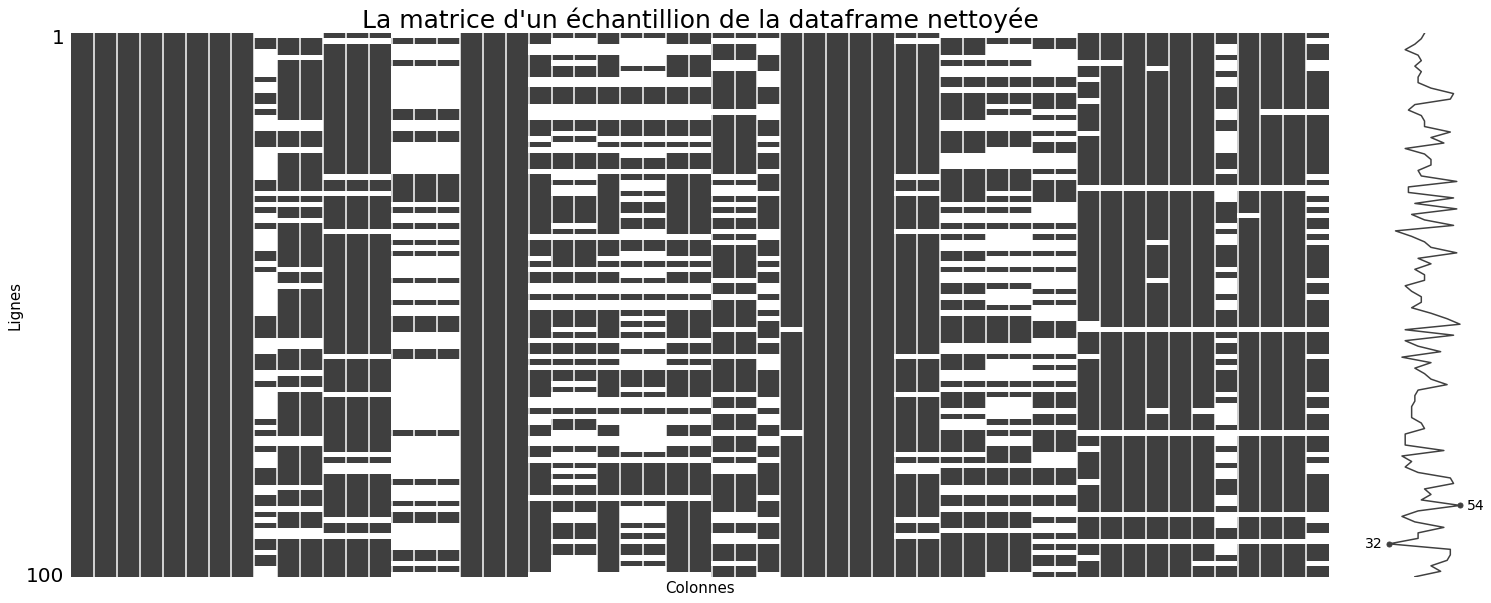

In [36]:
# la matrice de la dataframe nettoyée
msno.matrix(df.sample(100))
plt.title("La matrice d'un échantillion de la dataframe nettoyée", fontsize = 25) # title with fontsize 25
plt.xlabel('Colonnes', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Lignes', fontsize = 15) # y-axis label with fontsize 15

### Fin du test de la stratégie 1 de l'ordre de suppression de données.

J'étand le noyau et je le relance. Je parcour le code dès le début sans passer par la stratégie 1.

## Stratégie 2. Colonnes vides et ensuite les lignes

Text(-0.04, 0.5, 'Nombre de colonnes')

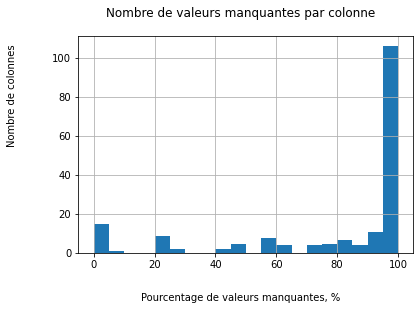

In [12]:
# histogramme pour les valeurs manquantes dans les colonnes
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_columns.hist(bins=20)
# set title and axis labels
plt.suptitle('Nombre de valeurs manquantes par colonne')
fig.text(0.5, -0.04, 'Pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'Nombre de colonnes', rotation='vertical')

Text(-0.04, 0.5, 'Nombre de colonnes')

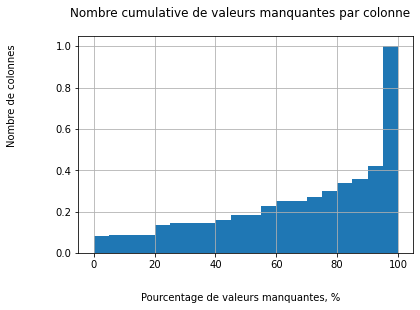

In [13]:
# Nombre cumulative de valeurs manquantes par colonne
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_columns.hist(bins=20, density=True, cumulative=True)
# set title and axis labels
plt.suptitle('Nombre cumulative de valeurs manquantes par colonne')
fig.text(0.5, -0.04, 'Pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'Nombre de colonnes', rotation='vertical')

### suppression de colonnes vide à 80 % et plus

In [14]:
df.drop(table_columns[table_columns > 80].index, axis='columns', inplace=True)

In [15]:
# nombre de colonnes restantes
len(df.columns)

55

In [16]:
# nombre de colonnes supprimées
columns_numb - len(df.columns)

128

Text(-0.04, 0.5, 'Nombre de lignes')

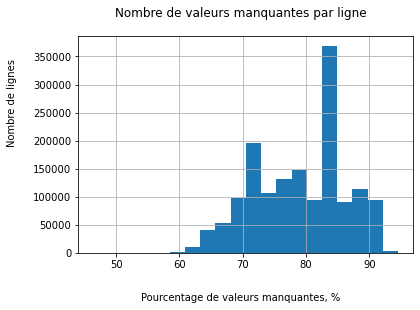

In [17]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_lignes.hist(bins=20)
# set title and axis labels
plt.suptitle('Nombre de valeurs manquantes par ligne')
fig.text(0.5, -0.04, 'Pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'Nombre de lignes', rotation='vertical')

Text(-0.04, 0.5, 'Nombre de lignes')

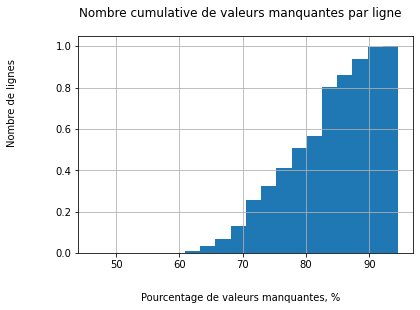

In [18]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
table_lignes.hist(bins=20, density=True, cumulative=True)
# set title and axis labels
plt.suptitle('Nombre cumulative de valeurs manquantes par ligne')
fig.text(0.5, -0.04, 'Pourcentage de valeurs manquantes, %', ha='center')
fig.text(-0.04, 0.5, 'Nombre de lignes', rotation='vertical')

Observations: La suppression de colonnes n'a, à priori, pas changé la distributions de données manquantes au niveau des lignes

### suppression de lignes vide à 80 % et plus

In [19]:
df.drop(df[table_lignes > 80].index, inplace=True)

In [20]:
# nombre de lignes restantes
len(df)

788035

__Observation__ : le nombre de lignes restantes est le même que lors de la suppression des lignes dans la Stratégie 1.

In [21]:
df[df.product_name.isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
872,000036,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537366963,2018-09-19T14:22:43Z,1582275040,2020-02-21T08:50:40Z,NaN,490 g,Bijou,...,1954.0,26.00,17.00,51.00,29.00,1.100,6.70,1.130,0.4520,25.0
2131,00030113,http://world-en.openfoodfacts.org/product/0003...,kiliweb,1517399507,2018-01-31T11:51:47Z,1600837950,2020-09-23T05:12:30Z,NaN,250 ml,Marks & Spencdjdj,...,180.0,0.10,0.10,9.80,9.10,0.500,0.40,0.100,0.0400,3.0
2529,00062855,http://world-en.openfoodfacts.org/product/0006...,waistline-app,1534406584,2018-08-16T08:03:04Z,1550256781,2019-02-15T18:53:01Z,NaN,NaN,M&S,...,472.0,2.10,NaN,17.80,10.90,NaN,4.70,0.103,0.0410,NaN
3098,00087,http://world-en.openfoodfacts.org/product/0008...,openfoodfacts-contributors,1589989006,2020-05-20T15:36:46Z,1589989245,2020-05-20T15:40:45Z,NaN,NaN,Banyan Botanicals,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3158,0008775,http://world-en.openfoodfacts.org/product/0008...,nnamretug,1570216872,2019-10-04T19:21:12Z,1570217628,2019-10-04T19:33:48Z,NaN,NaN,nutri+ Shape & Shake Vegan 3K Protein Vanilla-...,...,1582.0,1.20,0.15,5.30,1.10,2.000,84.60,1.600,0.6400,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553049,9556227821269,http://world-en.openfoodfacts.org/product/9556...,marilyn,1588735576,2020-05-06T03:26:16Z,1588736047,2020-05-06T03:34:07Z,NaN,850 ml,Best choice,...,1381.0,0.00,0.00,81.00,68.00,0.000,1.00,0.125,0.0500,NaN
1553052,9556231110281,http://world-en.openfoodfacts.org/product/9556...,openfoodfacts-contributors,1604455653,2020-11-04T02:07:33Z,1604455847,2020-11-04T02:10:47Z,NaN,NaN,NaN,...,1033.0,2.70,1.20,44.10,NaN,3.000,10.20,0.404,0.1616,NaN
1553691,96130797,http://world-en.openfoodfacts.org/product/9613...,sebleouf,1505915038,2017-09-20T13:43:58Z,1506447358,2017-09-26T17:35:58Z,NaN,25 g,Fisherman's Friend,...,1013.0,1.28,1.28,95.95,0.17,0.002,0.01,0.003,0.0012,NaN
1554867,9851135043117,http://world-en.openfoodfacts.org/product/9851...,openfoodfacts-contributors,1561824691,2019-06-29T16:11:31Z,1561825520,2019-06-29T16:25:20Z,NaN,700ml,Real Thai,...,218.0,0.00,0.00,5.00,5.00,NaN,7.90,27.100,10.8400,11.0


In [21]:
# suppression des lignes où le nom du produit n'est pas renseigné
df.drop(df[df.product_name.isnull()].index, inplace=True)

In [22]:
# suppression des lignes identiques
df.drop_duplicates(keep = 'first', inplace=True)

In [23]:
# le nombre des lignes restantes
len(df)

784643

In [24]:
# echantillon de 100 lignes
sample_data = df.sample(100)

<AxesSubplot:>

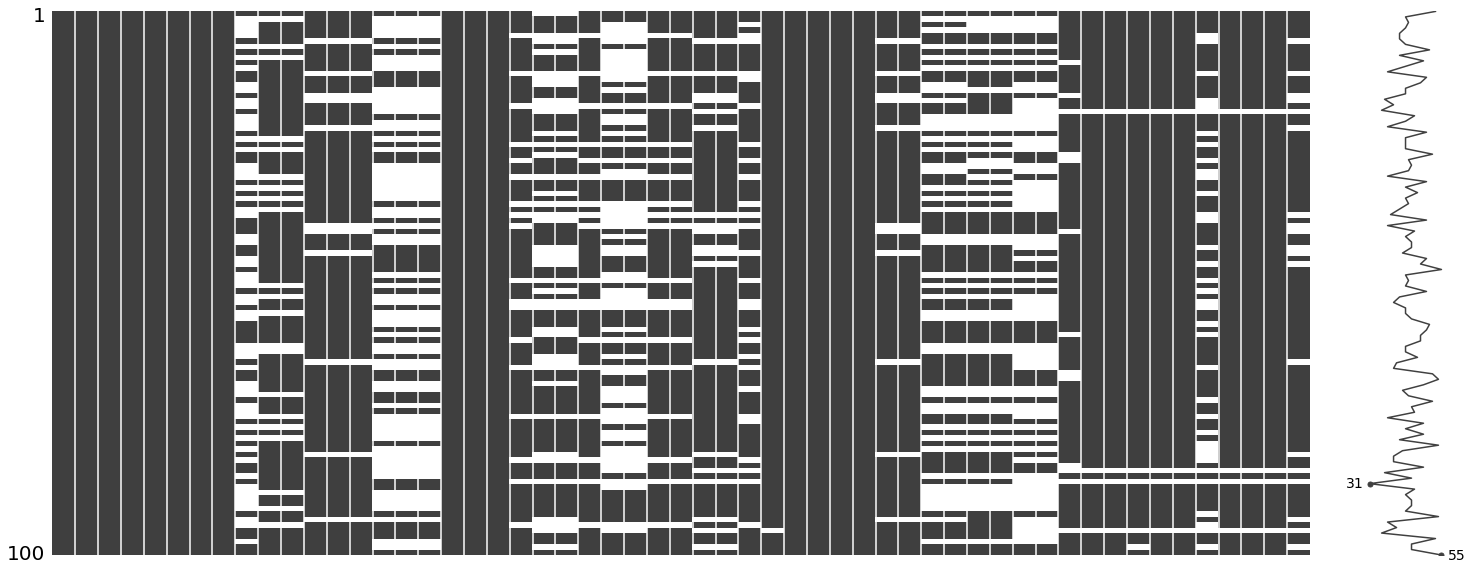

In [61]:
# la matrice de la dataframe nettoyée
msno.matrix(sample_data)

__Observations__ : certaines colonnes sont bien remplies. Il serait donc intéressant de ne pas les afficher pour pouvoir mieux visualiser les colonnes moins bien remplies.

In [25]:
# cols est un échantillion de données où il y a plus de 30% de valeurs manquantes dans les colonnes
cols = table_columns[table_columns > 30].index
cols = cols[cols.isin(df.columns)]
cols

Index(['quantity', 'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'labels', 'labels_tags', 'labels_en',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'main_category', 'main_category_en',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'fiber_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

Text(0, 0.5, 'Lignes')

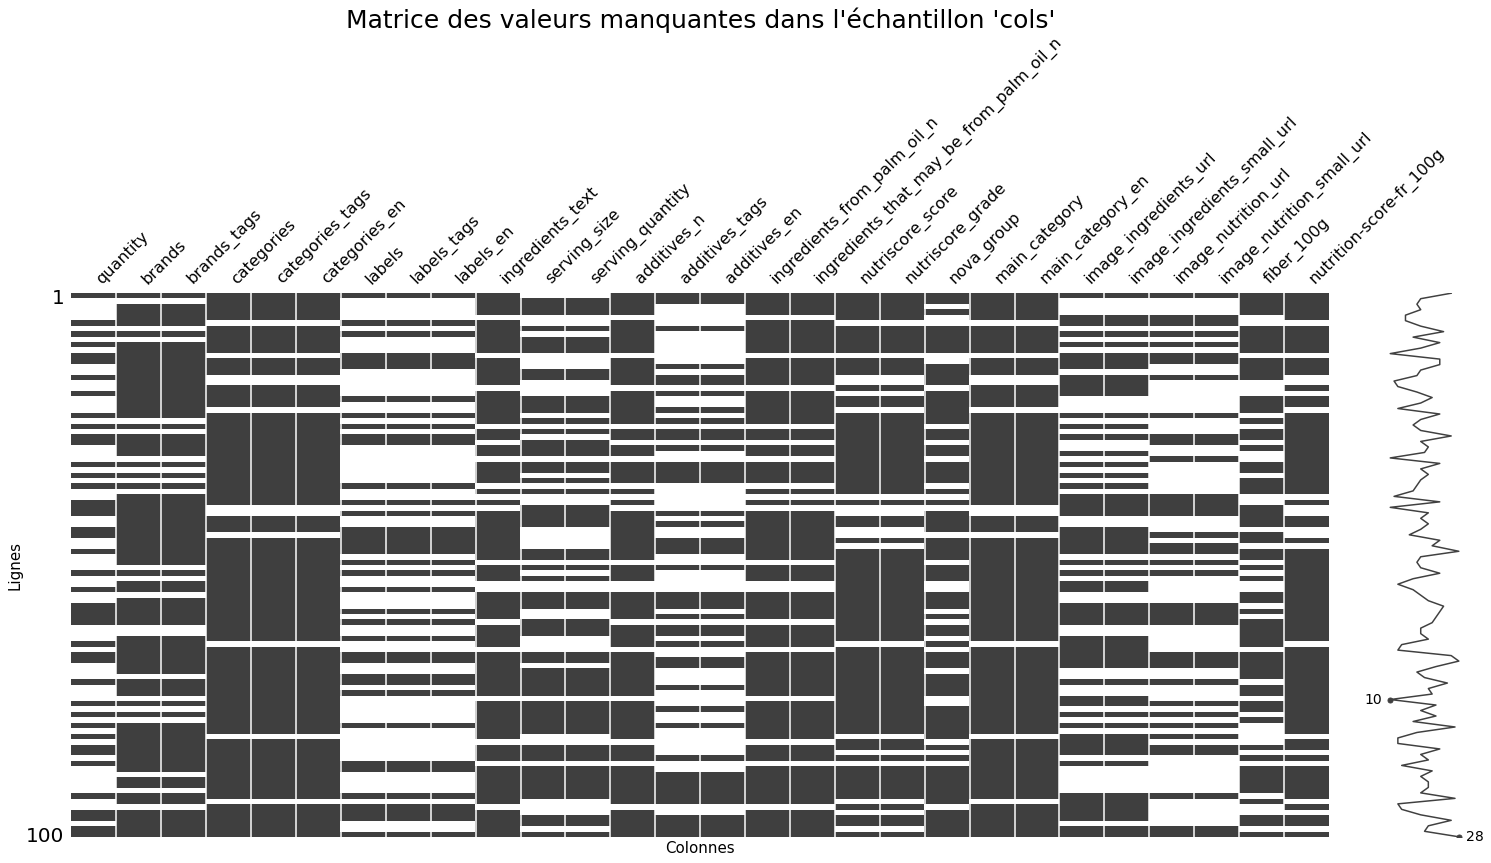

In [63]:
msno.matrix(sample_data[cols])
plt.title("Matrice des valeurs manquantes dans l'échantillon 'cols'", fontsize = 25) # title with fontsize 25
plt.xlabel('Colonnes', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Lignes', fontsize = 15) # y-axis label with fontsize 15

In [64]:
df[df['labels'].notnull()][['quantity','labels','labels_tags','labels_en']]

,quantity,labels,labels_tags,labels_en
3,100g,Delois france,fr:delois-france,fr:delois-france
111,NaN,Organic,en:organic,Organic
115,NaN,Organic,en:organic,Organic
116,NaN,Organic,en:organic,Organic
121,NaN,Organic,en:organic,Organic
...,...,...,...,...
1555372,NaN,en:no-colorings,en:no-colorings,No colorings
1555398,NaN,Organic,en:organic,Organic
1555400,NaN,Point Vert,en:green-dot,Green Dot
1555402,NaN,Sans sucre ajouté,en:no-added-sugar,No added sugar


In [68]:
df[df['additives_tags'].notnull()][['additives_n','additives_tags','additives_en']]

,additives_n,additives_tags,additives_en
20,5.0,"en:e150,en:e160a,en:e202,en:e316,en:e466","E150 - Caramel,E160a - Carotene,E202 - Potassi..."
28,1.0,en:e406,E406 - Agar
46,2.0,"en:e300,en:e503","E300 - Ascorbic acid,E503 - Ammonium carbonates"
52,1.0,en:e202,E202 - Potassium sorbate
54,2.0,"en:e500,en:e500ii,en:e503,en:e503ii","E500 - Sodium carbonates,E500ii - Sodium hydro..."
...,...,...,...
1555400,1.0,en:e300,E300 - Ascorbic acid
1555435,1.0,en:e160c,E160c - Paprika extract
1555438,2.0,"en:e171,en:e414","E171 - Titanium dioxide,E414 - Acacia gum"
1555450,7.0,"en:e102,en:e129,en:e150c,en:e330,en:e552,en:e9...","E102 - Tartrazine,E129 - Allura red ac,E150c -..."


In [66]:
df[df['image_ingredients_url'].notnull()][['image_ingredients_url','image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url']]

,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
13,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
20,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...
21,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
28,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
35,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
...,...,...,...,...
1555476,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
1555478,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
1555482,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
1555483,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...


__Observations__ : les colonnes *labels*, *quantity*, *additives_tags* et les liens vers les images peuvent s'avérer utiles pour l'exploitation des données, même si ces colonnes ne sont pas très bien remplies

In [67]:
df[df['nutriscore_score'].notnull()][['nutriscore_score','nutriscore_grade','nova_group','nutrition-score-fr_100g']]

,nutriscore_score,nutriscore_grade,nova_group,nutrition-score-fr_100g
3,18.0,d,NaN,18.0
13,1.0,b,NaN,1.0
21,14.0,d,NaN,14.0
31,-2.0,a,NaN,-2.0
35,1.0,b,NaN,1.0
...,...,...,...,...
1555476,17.0,d,NaN,17.0
1555478,0.0,b,NaN,0.0
1555482,15.0,d,NaN,15.0
1555483,12.0,d,4.0,12.0


L'information dans les colonnes nutriscore est, à priori, identique

## Variables intéressantes

L'idée est de pouvoir démontrer au consommateur l'intéret, autre que écologique, d'acheter les produits qui ne contiennent pas l'huile de palme. Nous arrêtons notre choix sur les variables suivantes: *ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n, pnns_groups_1, pnns_groups_2, additives_n*, et *nutriscore_score*.
Les grouppes 'pnns_groups_1' et 'pnns_groups_2' permetrons de généraliser les tendances.

In [18]:
# filtre de produits où les valeurs de teneur en sel sont aberrantes
df[df['salt_100g']>100][['product_name','salt_100g']]

,product_name,salt_100g
1953,Mediterranean Sea Salt,104.167500
2521,Cream Line Whole Milk Yogurt: Plain,157.000000
2945,Keto,103.846250
3725,Assorted dark chocolate truffles,104.000000
3972,Vegetable burritos,505.050505
...,...,...
1549637,100% Whey Chocolate Milkshake Flavor 900g,432.000000
1549993,Chicken Bites,1600.000000
1550135,Protein+ Plain Yoghurt,240.000000
1552353,milgro,1143.000000


In [75]:
np.NaN

nan

### Suppression des valeurs aberrantes dues aux erreurs dans les données

In [26]:
for c in ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']:
    df[c] = np.where((df[c]>100), np.NaN, df[c])
    df[c] = np.where((df[c]<0), np.NaN, df[c])

In [27]:
c

'sodium_100g'

In [28]:
df[df['product_name'] == 'Mediterranean Sea Salt'][['product_name','salt_100g']]

,product_name,salt_100g
1953,Mediterranean Sea Salt,NaN
40311,Mediterranean Sea Salt,100.0000
40336,Mediterranean Sea Salt,100.0000
40352,Mediterranean Sea Salt,100.0000
247223,Mediterranean Sea Salt,100.0000
331777,Mediterranean Sea Salt,100.0000
387754,Mediterranean Sea Salt,87.5000
426835,Mediterranean Sea Salt,96.6675


In [29]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'serving_size',
       'serving_quantity', 'additives_n', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', '

In [ ]:
# les colonnes à garder: 'energy-kcal_100g', fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'
# et aussi 'nova_group' car indique si les aliments sont transformés

In [89]:
# faire un filtre <0 et >900
df[df['energy-kcal_100g']>900][['product_name','energy-kcal_100g','energy_100g']]

,product_name,energy-kcal_100g,energy_100g
1538,Açai en polvo,2532.0,10594.0
2281,happy'box,2000.0,8400.0
2712,"Bunge, Clear Liquid Soybean Frying Oil",929.0,3887.0
8018,All-Vegetable Shortening,917.0,3837.0
8053,All Vegetable Shortening,917.0,3837.0
...,...,...,...
1552100,Bouillon boeuf,910.0,3807.0
1552399,Chocolate Butter Cookies,947.0,3960.0
1554486,Papabubble,1000.0,4184.0
1554725,NESQUIK,1000.0,4184.0


In [30]:
c = 'energy-kcal_100g'
df[c] = np.where((df[c]>900), np.NaN, df[c])
df[c] = np.where((df[c]<0), np.NaN, df[c])

In [31]:
(df[c]<0).sum()

0

In [32]:
(df['energy-kcal_100g']>900).sum()

0

La formule de calcul d'énergie en kcal : "E kcal = (9 x lipides) + (7 x alcool) + (4 x protéines) + (4 x glucides sauf polyols) + (2.4 x acides organiques) + (2.4 x polyols) + (2 x fibres)"

Il n'y a pas suffisement de données remplies pour vérifier les valeurs de l'énergie

La formule de calcul de nutri-score prend en compte: énergie (kJ), sucres simples (g), acides gras saturés (g), sel (mg), fibres (g), protéines (g), teneur en fruits ou légumes/noix (%). Mais ne prend pas en compte les additifs.

Stratégies de l'emputation des valeurs manquantes:

1. Mettre 0 ou médiane partout: n'est pas applicable ici car les produits trop différents
2. par groupe nutritionnel --> mieux
3. ML: k plus proche voisins pour trouver la valeur
4. par pnns1: groupe alimentaire

Il faut avoir une conaissance métier

#### Nettoyage des catégories et sous-catégories de PNNS (Programme national nutrition santé)

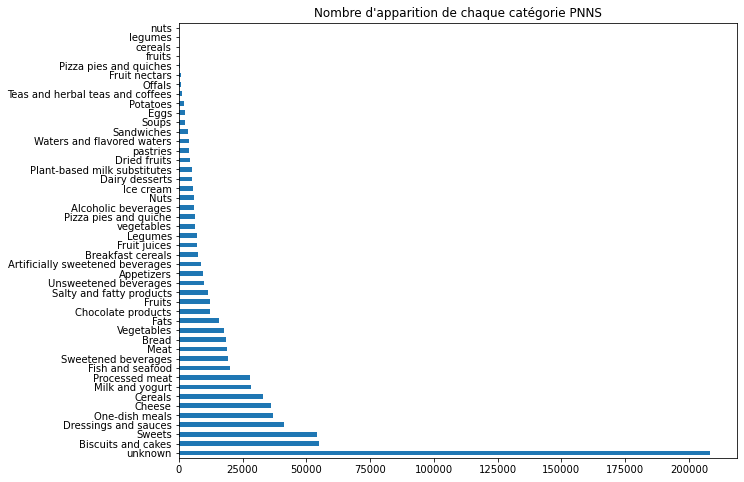

In [69]:
# à nettoyer (ex."nuts" et "Nuts")
# pnns_groups_2: des sous-catégories de pnns_groups_1
df['pnns_groups_2'].value_counts().plot.barh(figsize=(10,8))
plt.title("Nombre d'apparition de chaque catégorie PNNS")
plt.show()
# figsize

In [70]:
# vérifier, si il y a des valeurs NaN dans le groupe PNNS 2
df['pnns_groups_2'].isnull().sum()

0

In [71]:
# vérifier, si il y a des valeurs NaN dans le groupe PNNS 1
df['pnns_groups_1'].isnull().sum()

6628

In [72]:
df['pnns_groups_2'].value_counts()

unknown                             208319
Biscuits and cakes                   54860
Sweets                               54277
Dressings and sauces                 41413
One-dish meals                       37089
Cheese                               36195
Cereals                              33007
Milk and yogurt                      28277
Processed meat                       28079
Fish and seafood                     19938
Sweetened beverages                  19090
Meat                                 18848
Bread                                18444
Vegetables                           17851
Fats                                 15712
Chocolate products                   12335
Fruits                               12272
Salty and fatty products             11598
Unsweetened beverages                 9680
Appetizers                            9543
Artificially sweetened beverages      8514
Breakfast cereals                     7348
Fruit juices                          7184
Legumes    

##### toutes les lettres sont mis en minuscule

In [33]:
df['pnns_groups_2'].str.islower()

3          False
13         False
20          True
21         False
28          True
           ...  
1555476     True
1555478    False
1555482     True
1555483    False
1555484    False
Name: pnns_groups_2, Length: 784643, dtype: bool

In [34]:
df['pnns_groups_1'].value_counts()

unknown                    208319
Sugary snacks              121472
Milk and dairy products     75437
Fish Meat Eggs              70168
Cereals and potatoes        68100
Fat and sauces              57125
Beverages                   55834
Composite foods             46914
Fruits and vegetables       36944
Salty snacks                26921
fruits-and-vegetables        6639
sugary-snacks                4091
cereals-and-potatoes           46
salty-snacks                    5
Name: pnns_groups_1, dtype: int64

In [35]:
df['pnns_groups_1'] = df['pnns_groups_1'].str.lower()

In [36]:
df['pnns_groups_1'].value_counts()

unknown                    208319
sugary snacks              121472
milk and dairy products     75437
fish meat eggs              70168
cereals and potatoes        68100
fat and sauces              57125
beverages                   55834
composite foods             46914
fruits and vegetables       36944
salty snacks                26921
fruits-and-vegetables        6639
sugary-snacks                4091
cereals-and-potatoes           46
salty-snacks                    5
Name: pnns_groups_1, dtype: int64

##### le tiret est remplacé par un espace

In [37]:
df['pnns_groups_1'] = df['pnns_groups_1'].str.replace("-", " ")

In [38]:
df['pnns_groups_1'].value_counts()

unknown                    208319
sugary snacks              125563
milk and dairy products     75437
fish meat eggs              70168
cereals and potatoes        68146
fat and sauces              57125
beverages                   55834
composite foods             46914
fruits and vegetables       43583
salty snacks                26926
Name: pnns_groups_1, dtype: int64

In [39]:
df['pnns_groups_2'] = df['pnns_groups_2'].str.lower()

In [40]:
df['pnns_groups_2'].value_counts()

unknown                             208319
biscuits and cakes                   54860
sweets                               54277
dressings and sauces                 41413
one-dish meals                       37089
cheese                               36195
cereals                              33039
milk and yogurt                      28277
processed meat                       28079
vegetables                           24232
fish and seafood                     19938
sweetened beverages                  19090
meat                                 18848
bread                                18444
fats                                 15712
fruits                               12530
chocolate products                   12335
salty and fatty products             11598
unsweetened beverages                 9680
appetizers                            9543
artificially sweetened beverages      8514
breakfast cereals                     7348
fruit juices                          7184
legumes    

In [162]:
# df['pnns_groups_1'] = df['pnns_groups_1'].replace('unknown', np.nan)

In [164]:
# df['pnns_groups_2'] = df['pnns_groups_2'].replace('unknown', np.nan)

In [41]:
# remplacement de 'unknown' par NaN
for col in ['pnns_groups_1', 'pnns_groups_2']:
    df[col] = df[col].replace('unknown', np.nan)

In [42]:
df['pnns_groups_1'].value_counts()

sugary snacks              125563
milk and dairy products     75437
fish meat eggs              70168
cereals and potatoes        68146
fat and sauces              57125
beverages                   55834
composite foods             46914
fruits and vegetables       43583
salty snacks                26926
Name: pnns_groups_1, dtype: int64

In [43]:
df['pnns_groups_2'].value_counts()

biscuits and cakes                  54860
sweets                              54277
dressings and sauces                41413
one-dish meals                      37089
cheese                              36195
cereals                             33039
milk and yogurt                     28277
processed meat                      28079
vegetables                          24232
fish and seafood                    19938
sweetened beverages                 19090
meat                                18848
bread                               18444
fats                                15712
fruits                              12530
chocolate products                  12335
salty and fatty products            11598
unsweetened beverages                9680
appetizers                           9543
artificially sweetened beverages     8514
breakfast cereals                    7348
fruit juices                         7184
legumes                              7127
pizza pies and quiche             

### Fusion des colonnes 'ingredients_from_palm_oil_n' et 'ingredients_that_may_be_from_palm_oil_n'

In [44]:
df[['product_name','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']]

,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
3,moutarde au moût de raisin,0.0,0.0
13,Salade de carottes râpées,NaN,NaN
20,Solène céréales poulet,0.0,0.0
21,Tarte noix de coco,NaN,NaN
28,Crème dessert chocolat,0.0,0.0
...,...,...,...
1555476,Mousse au chocolat noir,NaN,NaN
1555478,Riz parfumé,NaN,NaN
1555482,Minis beignets,NaN,NaN
1555483,Erdbeerkuchen 1019g tiefgefroren,0.0,0.0


In [45]:
# on vérifie si la valeur NaN est présente toujours en même temps dans les deux colonnes
(df['ingredients_from_palm_oil_n'].isna() != df['ingredients_that_may_be_from_palm_oil_n'].isna()).sum()

0

In [46]:
# y a-t-il des cellules dans la colonne 'ingredients_from_palm_oil_n', qui sont remplies(not NaN), et où le nombre des ingrédients est supérior à celui dans la colonne 'ingredients_that_may_be_from_palm_oil_n' ?
df[(~df['ingredients_from_palm_oil_n'].isna() & (df['ingredients_from_palm_oil_n'] > df['ingredients_that_may_be_from_palm_oil_n']))][['product_name','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']]

,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
326,Salade Cesar,1.0,0.0
623,Galette de Pommes de Terre,1.0,0.0
1471,Baguette Poulet,1.0,0.0
1918,Lasagnes à la bolognaise,1.0,0.0
1988,4 Indulgent & Chewy Maple Syrup & Pecan Giant ...,1.0,0.0
...,...,...,...
1553191,Oat krunch,1.0,0.0
1553244,Mini Paratha,1.0,0.0
1554227,Choco Petit Beurre,1.0,0.0
1555317,Mini stollen,1.0,0.0


In [47]:
# y a-t-il des produits, où il n'y a pas d'ingrédients à partir de l'huile de palme, mais qui contiennent des ingrédients qui peuvent être faits à partir de l'huile de palme
df[(~df['ingredients_from_palm_oil_n'].isna() & (df['ingredients_from_palm_oil_n'] < df['ingredients_that_may_be_from_palm_oil_n']))][['product_name','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']]

,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
340,Danoises à la cannelle roulées,0.0,1.0
346,Entremets Crème Brulée,0.0,2.0
398,Biscuits sablés fourrage au cacao,0.0,1.0
402,Quiche Lorraine,0.0,1.0
440,Pâte à Sucre,0.0,2.0
...,...,...,...
1554135,Madeleines coquilles marbres,0.0,1.0
1554822,biscottes sans gluten,0.0,1.0
1554909,Coffret de 10 Mini Cookies,0.0,1.0
1554914,Biscuits cacaotés fourrés saveur vanille,0.0,1.0


In [48]:
# si les valeurs de colonnes ne sont pas NaN, on fait la somme des deux
df['ingredients_with_possible_presence_of_palm_oil_n'] = np.where((df['ingredients_from_palm_oil_n'].notna() & df['ingredients_that_may_be_from_palm_oil_n'].notna()), df['ingredients_from_palm_oil_n']+df['ingredients_that_may_be_from_palm_oil_n'], np.NaN)

In [49]:
df[(df['ingredients_from_palm_oil_n'].notna() & df['ingredients_from_palm_oil_n']>0)][['ingredients_with_possible_presence_of_palm_oil_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']]

,ingredients_with_possible_presence_of_palm_oil_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
326,1.0,1.0,0.0
539,4.0,1.0,3.0
623,1.0,1.0,0.0
1465,2.0,1.0,1.0
1471,1.0,1.0,0.0
...,...,...,...
1553371,3.0,1.0,2.0
1553377,2.0,1.0,1.0
1554227,1.0,1.0,0.0
1555317,1.0,1.0,0.0


In [50]:
df['ingredients_text'].str.find("palm") >= 0

3          False
13         False
20         False
21         False
28         False
           ...  
1555476    False
1555478    False
1555482    False
1555483    False
1555484    False
Name: ingredients_text, Length: 784643, dtype: bool

In [51]:
df[(df['ingredients_with_possible_presence_of_palm_oil_n'].isna()) & (df['ingredients_text'].str.find("palm") >= 0)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,ingredients_with_possible_presence_of_palm_oil_n


In [92]:
# creator
df['creator'].value_counts()

kiliweb                       265730
usda-ndb-import               165636
org-database-usda             131070
openfoodfacts-contributors     68189
elcoco                         11635
                               ...  
stefano-rend-gmail-com             1
gba                                1
dadmat                             1
laurie-alz                         1
pius29                             1
Name: creator, Length: 9251, dtype: int64

# Mise à jour du 22/01/2021
Nettoyage suplémentaire suite aux observations faites lors de l'analyse bi-varié.
Suppression des valeurs abérantes dans les colonnes _'sugars_100g'_ et _'saturated-fat_100g'

In [52]:
df['sugars_100g'] = np.where((df['sugars_100g']>df['carbohydrates_100g']), np.NaN, df['sugars_100g'])

In [53]:
df['saturated-fat_100g'] = np.where((df['saturated-fat_100g']>df['fat_100g']), np.NaN, df['saturated-fat_100g'])

Ajout d'une colonne suplémentaire pour connaitre la présence ou absence de l'huile de palme dans un produit.

In [56]:
df['possibility_of_presence_of_palm_oil'] = df['ingredients_with_possible_presence_of_palm_oil_n']>0

In [59]:
(df['possibility_of_presence_of_palm_oil'] == True).sum()

47207

Ajout d'une colonne suplémentaire pour connaitre la présence ou absence des additifs dans un produit

In [66]:
df['presence_of_additives'] = df['additives_n']>0

In [67]:
(df['presence_of_additives'] == True).sum()

366769

In [1]:
#sauvegarde de dataframe
#df.to_parquet(r'C:\Users\piari\Documents\tmp.pq')

NameError: name 'df' is not defined

In [68]:
df_clean = df[['product_name','ingredients_with_possible_presence_of_palm_oil_n', 'possibility_of_presence_of_palm_oil', 'pnns_groups_1', 'pnns_groups_2', 'additives_n', 'additives_en', 'presence_of_additives', 'nutriscore_score', 'nutriscore_grade','energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nova_group']]

In [69]:
df_clean.head()

,product_name,ingredients_with_possible_presence_of_palm_oil_n,possibility_of_presence_of_palm_oil,pnns_groups_1,pnns_groups_2,additives_n,additives_en,presence_of_additives,nutriscore_score,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nova_group
3,moutarde au moût de raisin,0.0,False,fat and sauces,dressings and sauces,0.0,NaN,False,18.0,d,NaN,8.2,2.2,29.0,22.0,0.0,5.1,4.600,NaN
13,Salade de carottes râpées,NaN,False,composite foods,one-dish meals,NaN,NaN,False,1.0,b,32.0,0.3,0.1,5.3,3.9,NaN,0.9,0.420,NaN
20,Solène céréales poulet,0.0,False,NaN,NaN,5.0,"E150 - Caramel,E160a - Carotene,E202 - Potassi...",True,NaN,NaN,219.0,5.9,0.5,30.3,1.7,2.8,9.7,0.464,4.0
21,Tarte noix de coco,NaN,False,sugary snacks,biscuits and cakes,NaN,NaN,False,14.0,d,381.0,22.0,15.5,27.3,21.9,4.4,4.6,0.100,NaN
28,Crème dessert chocolat,0.0,False,NaN,NaN,1.0,E406 - Agar,True,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.000,4.0


In [70]:
df_clean.describe()

,ingredients_with_possible_presence_of_palm_oil_n,additives_n,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nova_group
count,618451.000000,618451.000000,609772.000000,694988.000000,758259.000000,717492.000000,757585.000000,739886.000000,436702.000000,757617.000000,751552.000000,554046.000000
mean,0.093768,2.094801,9.148296,272.723009,13.583063,5.201793,29.226622,14.240819,2.927804,7.954593,1.332005,3.431636
std,0.359497,2.948114,8.905421,189.962875,17.753380,7.836716,28.250413,20.028256,4.791104,8.931619,5.017944,0.958595
min,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,100.000000,0.500000,0.100000,4.200000,0.870000,0.000000,1.180000,0.070000,3.000000
50%,0.000000,1.000000,10.000000,263.000000,6.670000,1.900000,17.000000,4.300000,1.600000,5.500000,0.560000,4.000000
75%,0.000000,3.000000,16.000000,400.000000,21.430000,7.300000,54.200000,20.610000,3.600000,11.200000,1.320000,4.000000
max,6.000000,39.000000,40.000000,900.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,4.000000


Text(0, 0.5, 'Lignes')

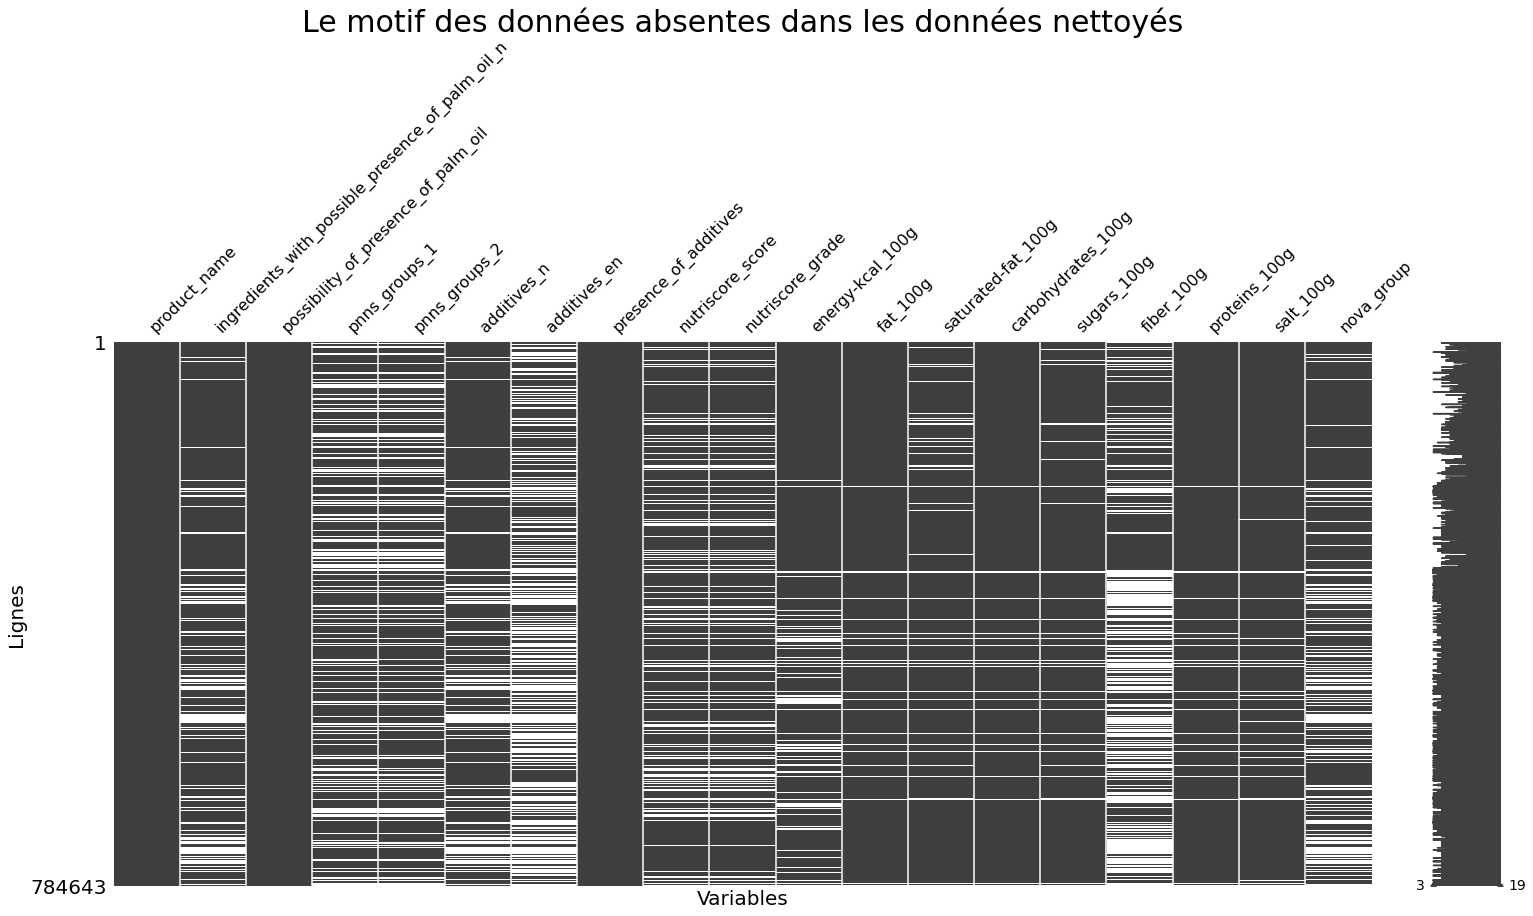

In [71]:
msno.matrix(df_clean)
plt.title('Le motif des données absentes dans les données nettoyés', fontsize = 30) # title with fontsize 30
plt.xlabel('Variables', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Lignes', fontsize = 20) # y-axis label with fontsize 15

Text(158.09374999999997, 0.5, 'Variables')

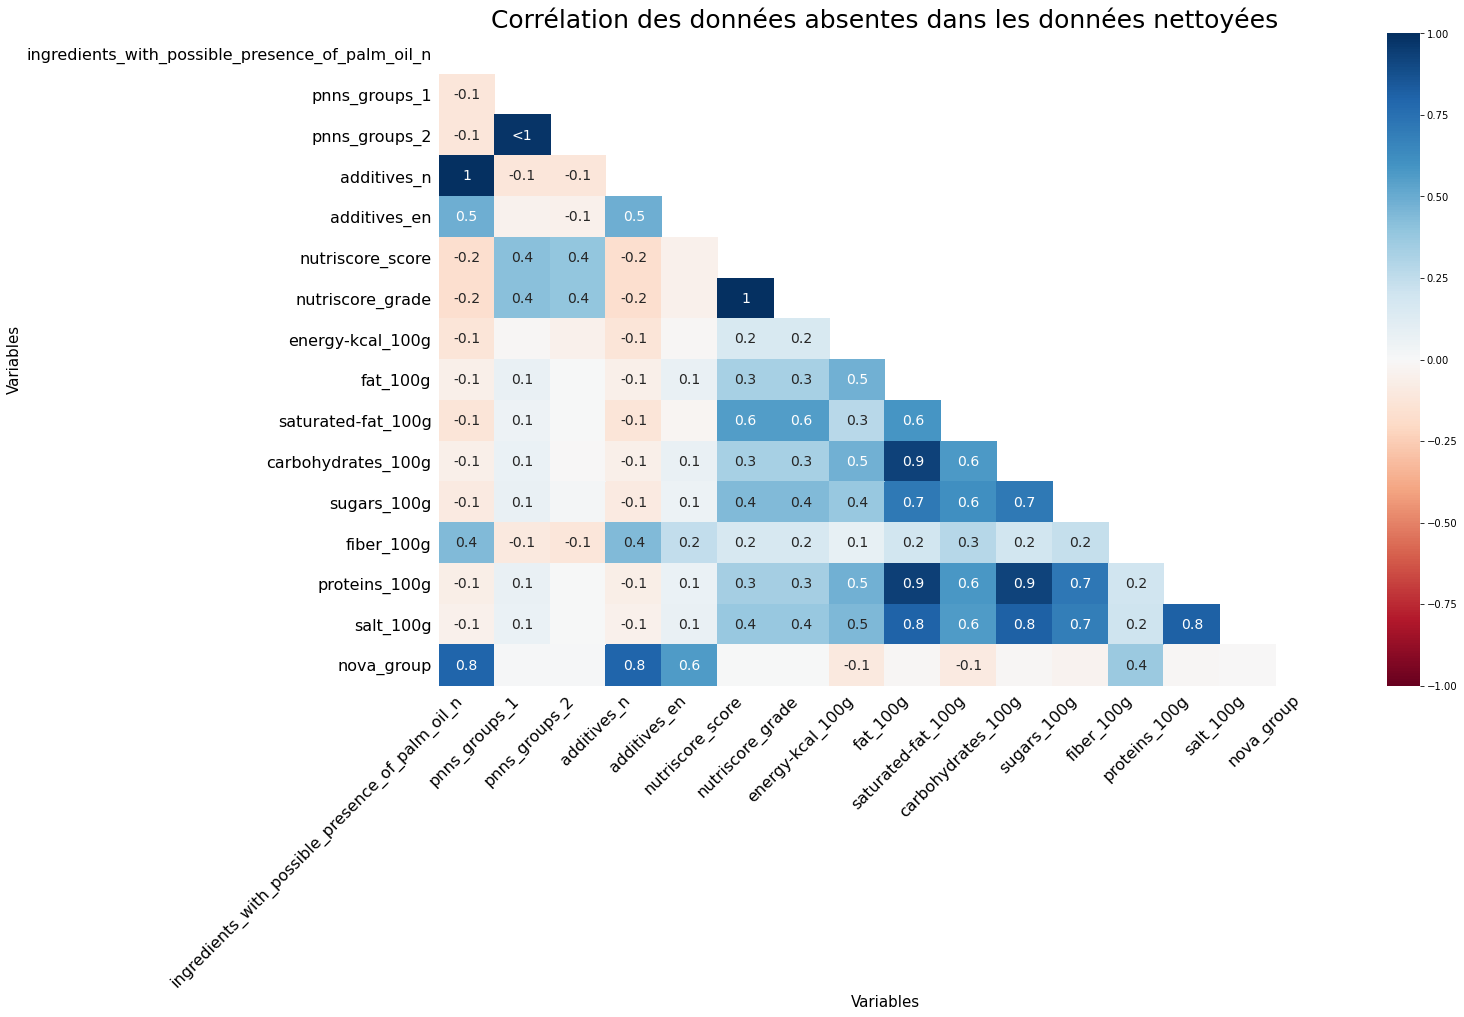

In [72]:
msno.heatmap(df_clean)
plt.title('Corrélation des données absentes dans les données nettoyées', fontsize = 25) # title with fontsize 20
plt.xlabel('Variables', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Variables', fontsize = 15) # y-axis label with fontsize 15

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. (Source: https://github.com/ResidentMario/missingno?utm_medium=email&utm_content=nov-18-has-completed-mentoring-session-student&bsft_clkid=6ac73fc1-7982-4989-a5e3-fb6d5c2f5096&bsft_uid=50501e09-2016-4835-aa02-b362d3a0d52a&bsft_mid=11d5a35f-0bfa-4a5a-bbe3-89c3b512e156&bsft_eid=7244055d-47f0-a6f2-c394-7a20ebb3a726&bsft_txnid=fb5029d4-b089-4054-a7ad-813ce38763d9&bsft_mime_type=html&bsft_ek=2020-12-22T21%3A37%3A16Z&bsft_aaid=a265d396-7432-4eb2-9c9a-ba5eea75629e&bsft_tv=1 )

__Observation__ : lorsqu'il y a une presence possible de l'huile de palme dans un produit, il y a toujours un additif

In [73]:
df_clean.to_csv('clean_products.csv', encoding='utf-8', index=False)